In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t', header=None)
df.columns=['review', 'label']
df.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
df['label'] = (df['label'] == 1)
df.head()

,review,label
0,So there is no way for me to plug it in here i...,False
1,"Good case, Excellent value.",True
2,Great for the jawbone.,True
3,Tied to charger for conversations lasting more...,False
4,The mic is great.,True


In [8]:
keywords1 = ['no', 'bad', 'never', 'ever', 'not', 'return', 'back', 'down', 'waste', 'but', 'hate', 'short', 'poor', 'great', 'excellent',
            'best', 'awesome', 'good', 'very', 'well']

for key in keywords1:
    df[str(key)] = df.review.str.contains('' + str(key) + '', case=False)
    
keywords2 = ["n't", 'dissapoint', 'less', 'fail', 'problem', 'un', 'mis', 'dis', '\?','work']

for key in keywords2:
    df[str(key)] = df.review.str.contains(str(key) , case=False)

df.head()

,review,label,no,bad,never,ever,not,return,back,down,...,n't,dissapoint,less,fail,problem,un,mis,dis,\?,work
0,So there is no way for me to plug it in here i...,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


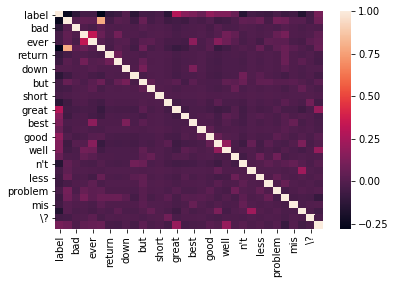

In [9]:
sns.heatmap(df.corr())

In [10]:
# creating model

data = df[keywords1 + keywords2]
target = df['label']

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print('The number of mislabeled reviwes are {} out of {}'.format((target != y_pred).sum(), data.shape[0]))

The number of mislabeled reviwes are 239 out of 1000


In [7]:

from sklearn.metrics import confusion_matrix

confusion_matrix(target, y_pred)

array([[339, 161],
       [ 78, 422]])